<a href="https://colab.research.google.com/github/Lokeshkonga3/CLUSTERING-ANALYSIS-OF-TITANIC-DATASET-USING-K-MEANS-AND-PCA/blob/main/TASK_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving titanic.csv to titanic.csv


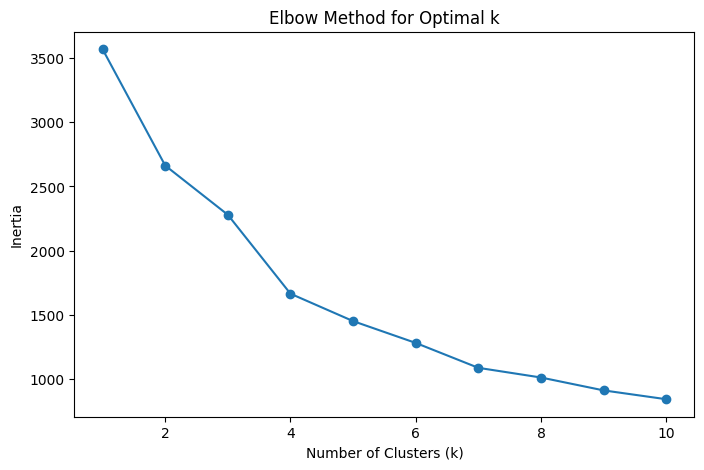

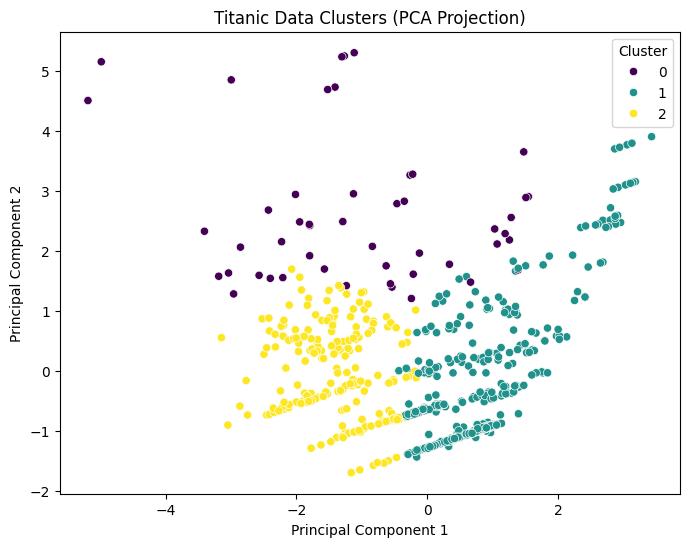

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the dataset
from google.colab import files
uploaded=files.upload()
df = pd.read_csv("titanic.csv")

# Data Preprocessing
df = df[['Age', 'Fare', 'Pclass', 'SibSp', 'Parch']].dropna()  # Selecting features & dropping missing values

# Standardizing the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Apply K-Means Clustering
# Using the Elbow method to find the optimal number of clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()

# Applying K-means with the chosen number of clusters
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust k based on Elbow method
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Apply PCA for Dimensionality Reduction
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Visualizing clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x=df_pca[:,0], y=df_pca[:,1], hue=df['Cluster'], palette="viridis")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Titanic Data Clusters (PCA Projection)")
plt.show()